# Zero to Hero

## 1.03  Construyendo un arbol

Se construye un arbol de decisión, se ven distintas formas de pasar los parámetros y distintas formas de dibujarlo.
<br>
Se muestran funcionalidades básicas de0la libreria  *data.table*

In [1]:
library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart

In [2]:
options(repr.plot.width=25, repr.plot.height=25)  #para que los gráficos me salgan legibles

In [3]:
setwd("C:/Archivos/dmeyf")  #se establece el directorio de trabajo
dataset <- fread("./datasetsOri/paquete_premium_202009.csv")

In [ ]:
# dataset <- fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

Ahora entreno un arbol de decision
<br>
"clase_ternaria ~ ."  significa predecir clase_ternaria utilizando *todo el resto* de las variables del dataset

In [4]:
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset  )

Imprimo el modelo con la muy básica funcion print() de la libreria rpart

In [5]:
print( modelo)

n= 235354 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 235354 1460 CONTINUA (0.002910509 0.003292912 0.993796579) *


Esta impresión no es gráfica. No me sirve.
<br>
a pesar que no me sirve, he encontrado una piedra en el camino, me está generando un arbol con un solo nodo, con solo la raiz

Busco bibliografía y encuentro que existe la libreria  **rpart.plot** que grafica arboles generados con la libreria  *rpart*

In [6]:
library("rpart.plot")

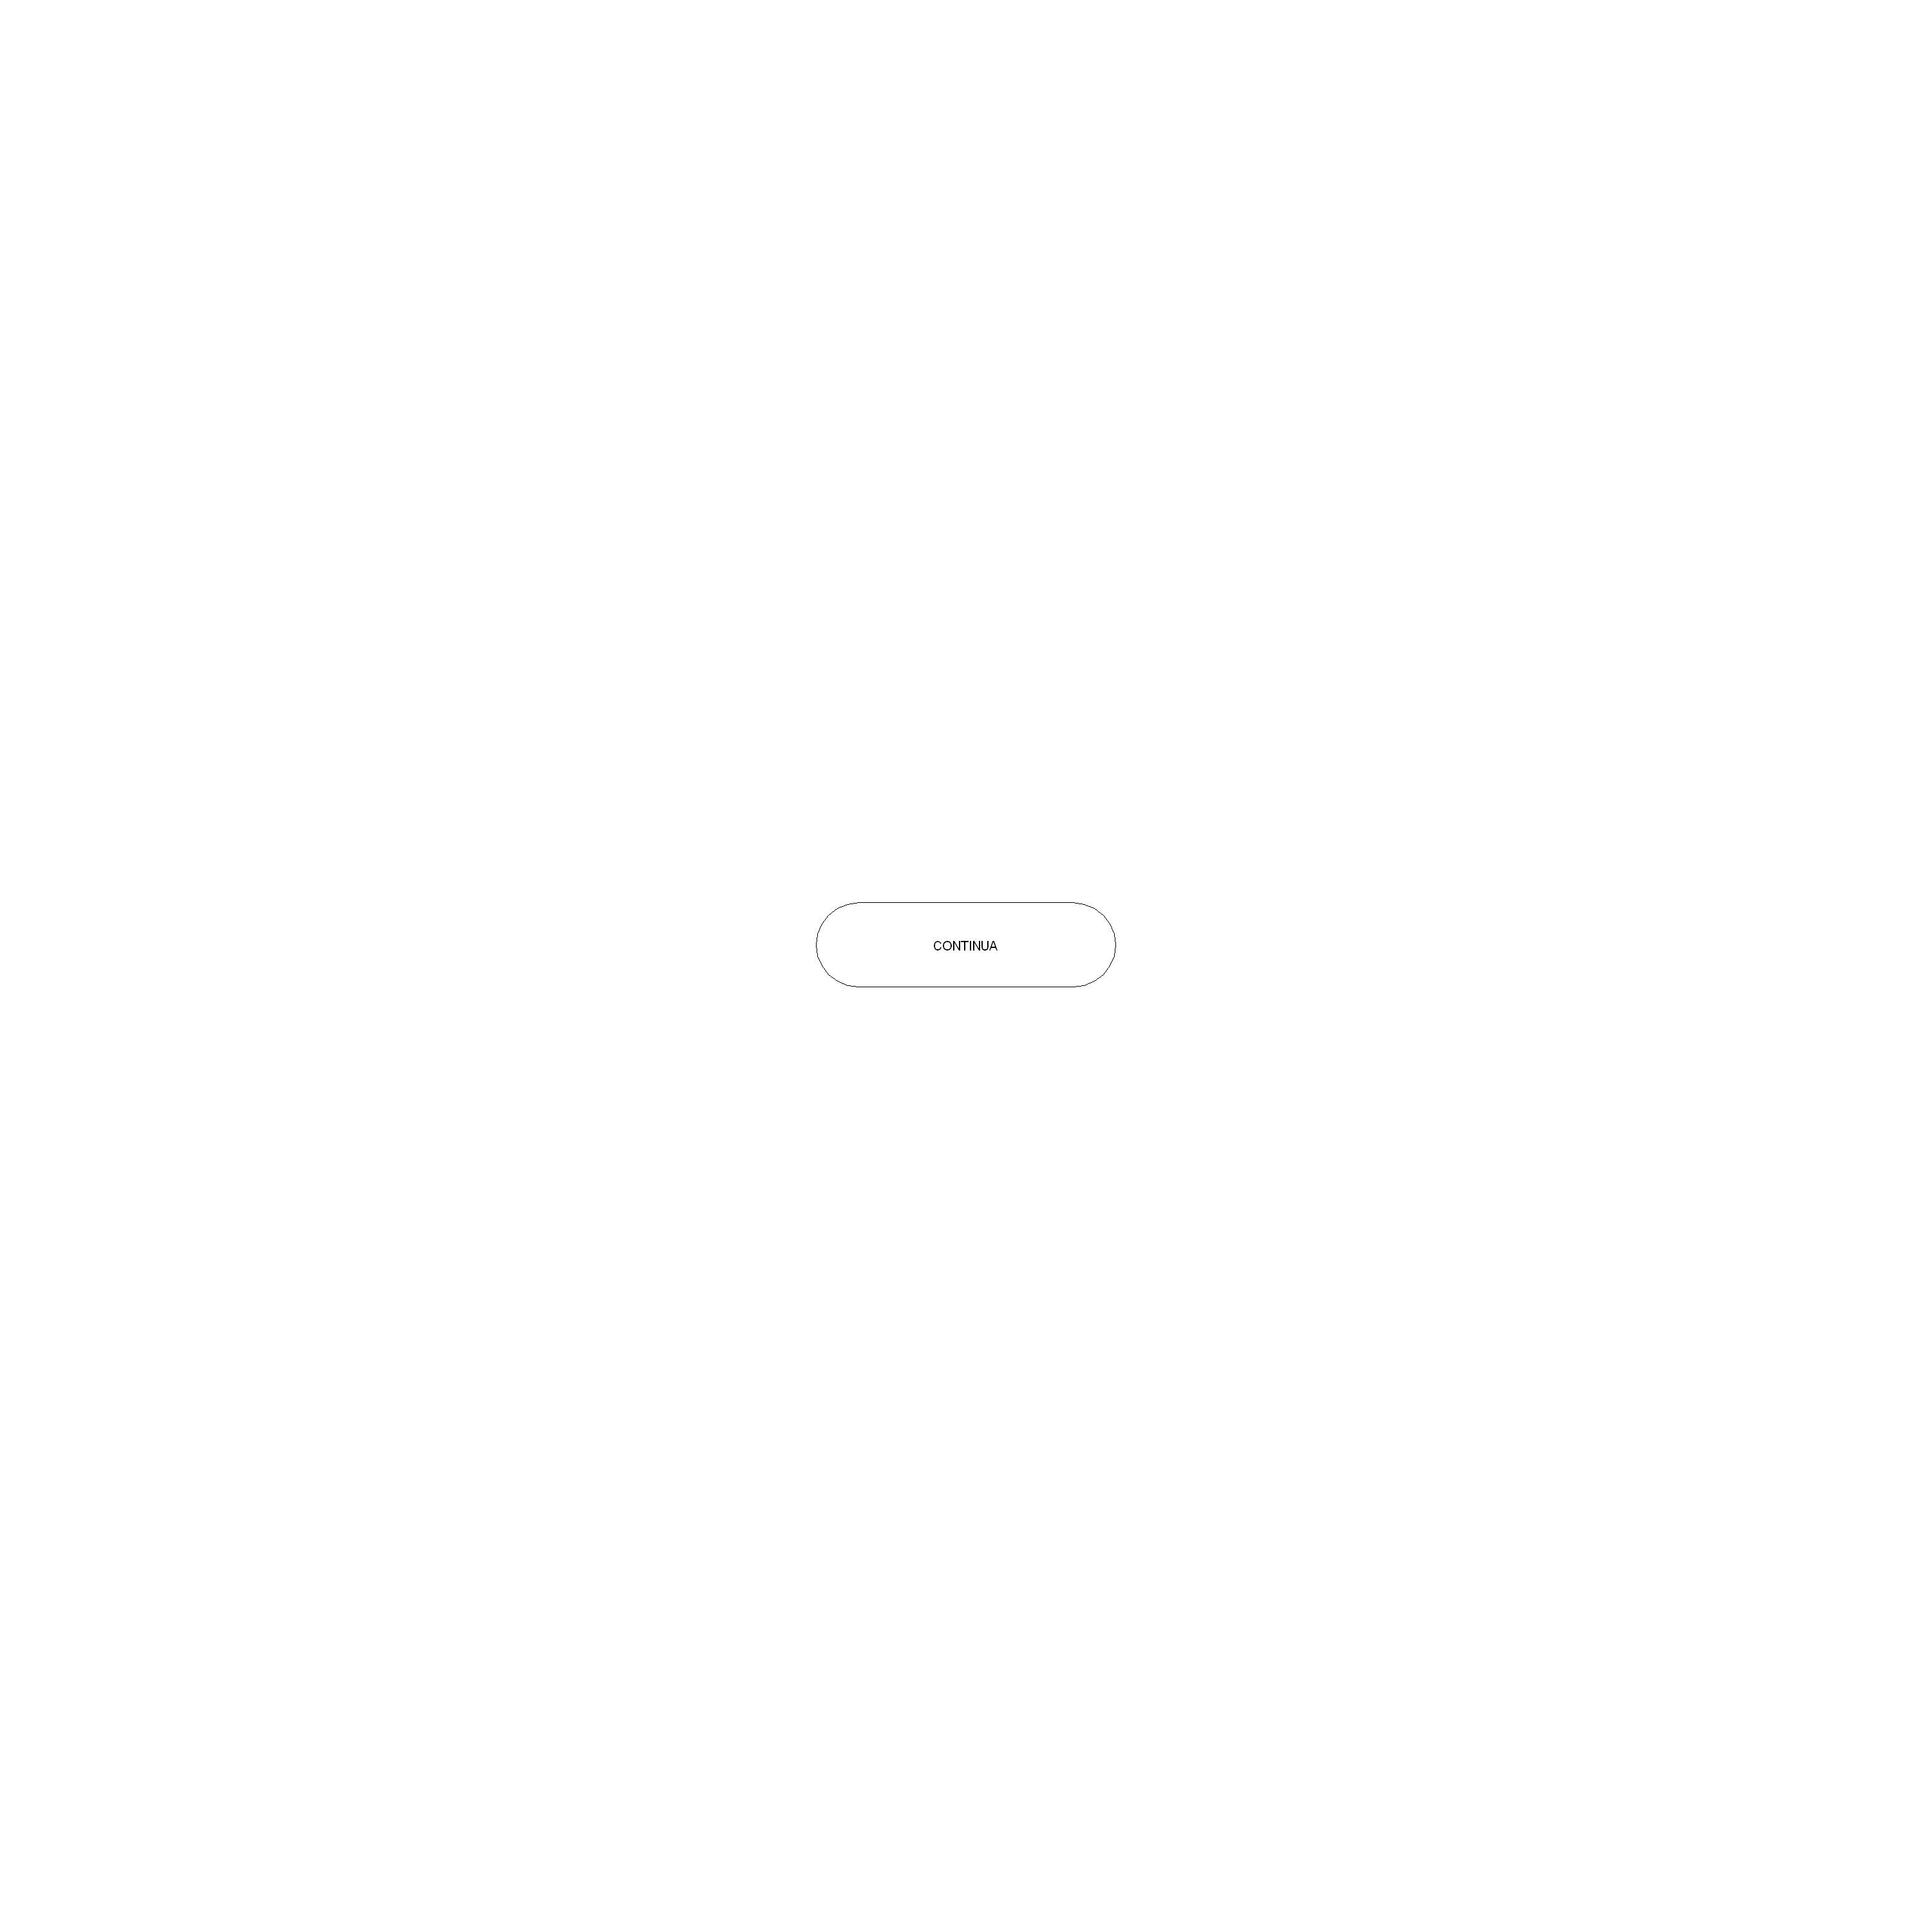

In [7]:
rpart.plot::prp(modelo)

Me ha salido una impresión del arbol, que es un solo nodo, pero solo dice continua.
<br>
leo la documentacion de la librería rpart.plot   https://cran.r-project.org/web/packages/rpart.plot/rpart.plot.pdf

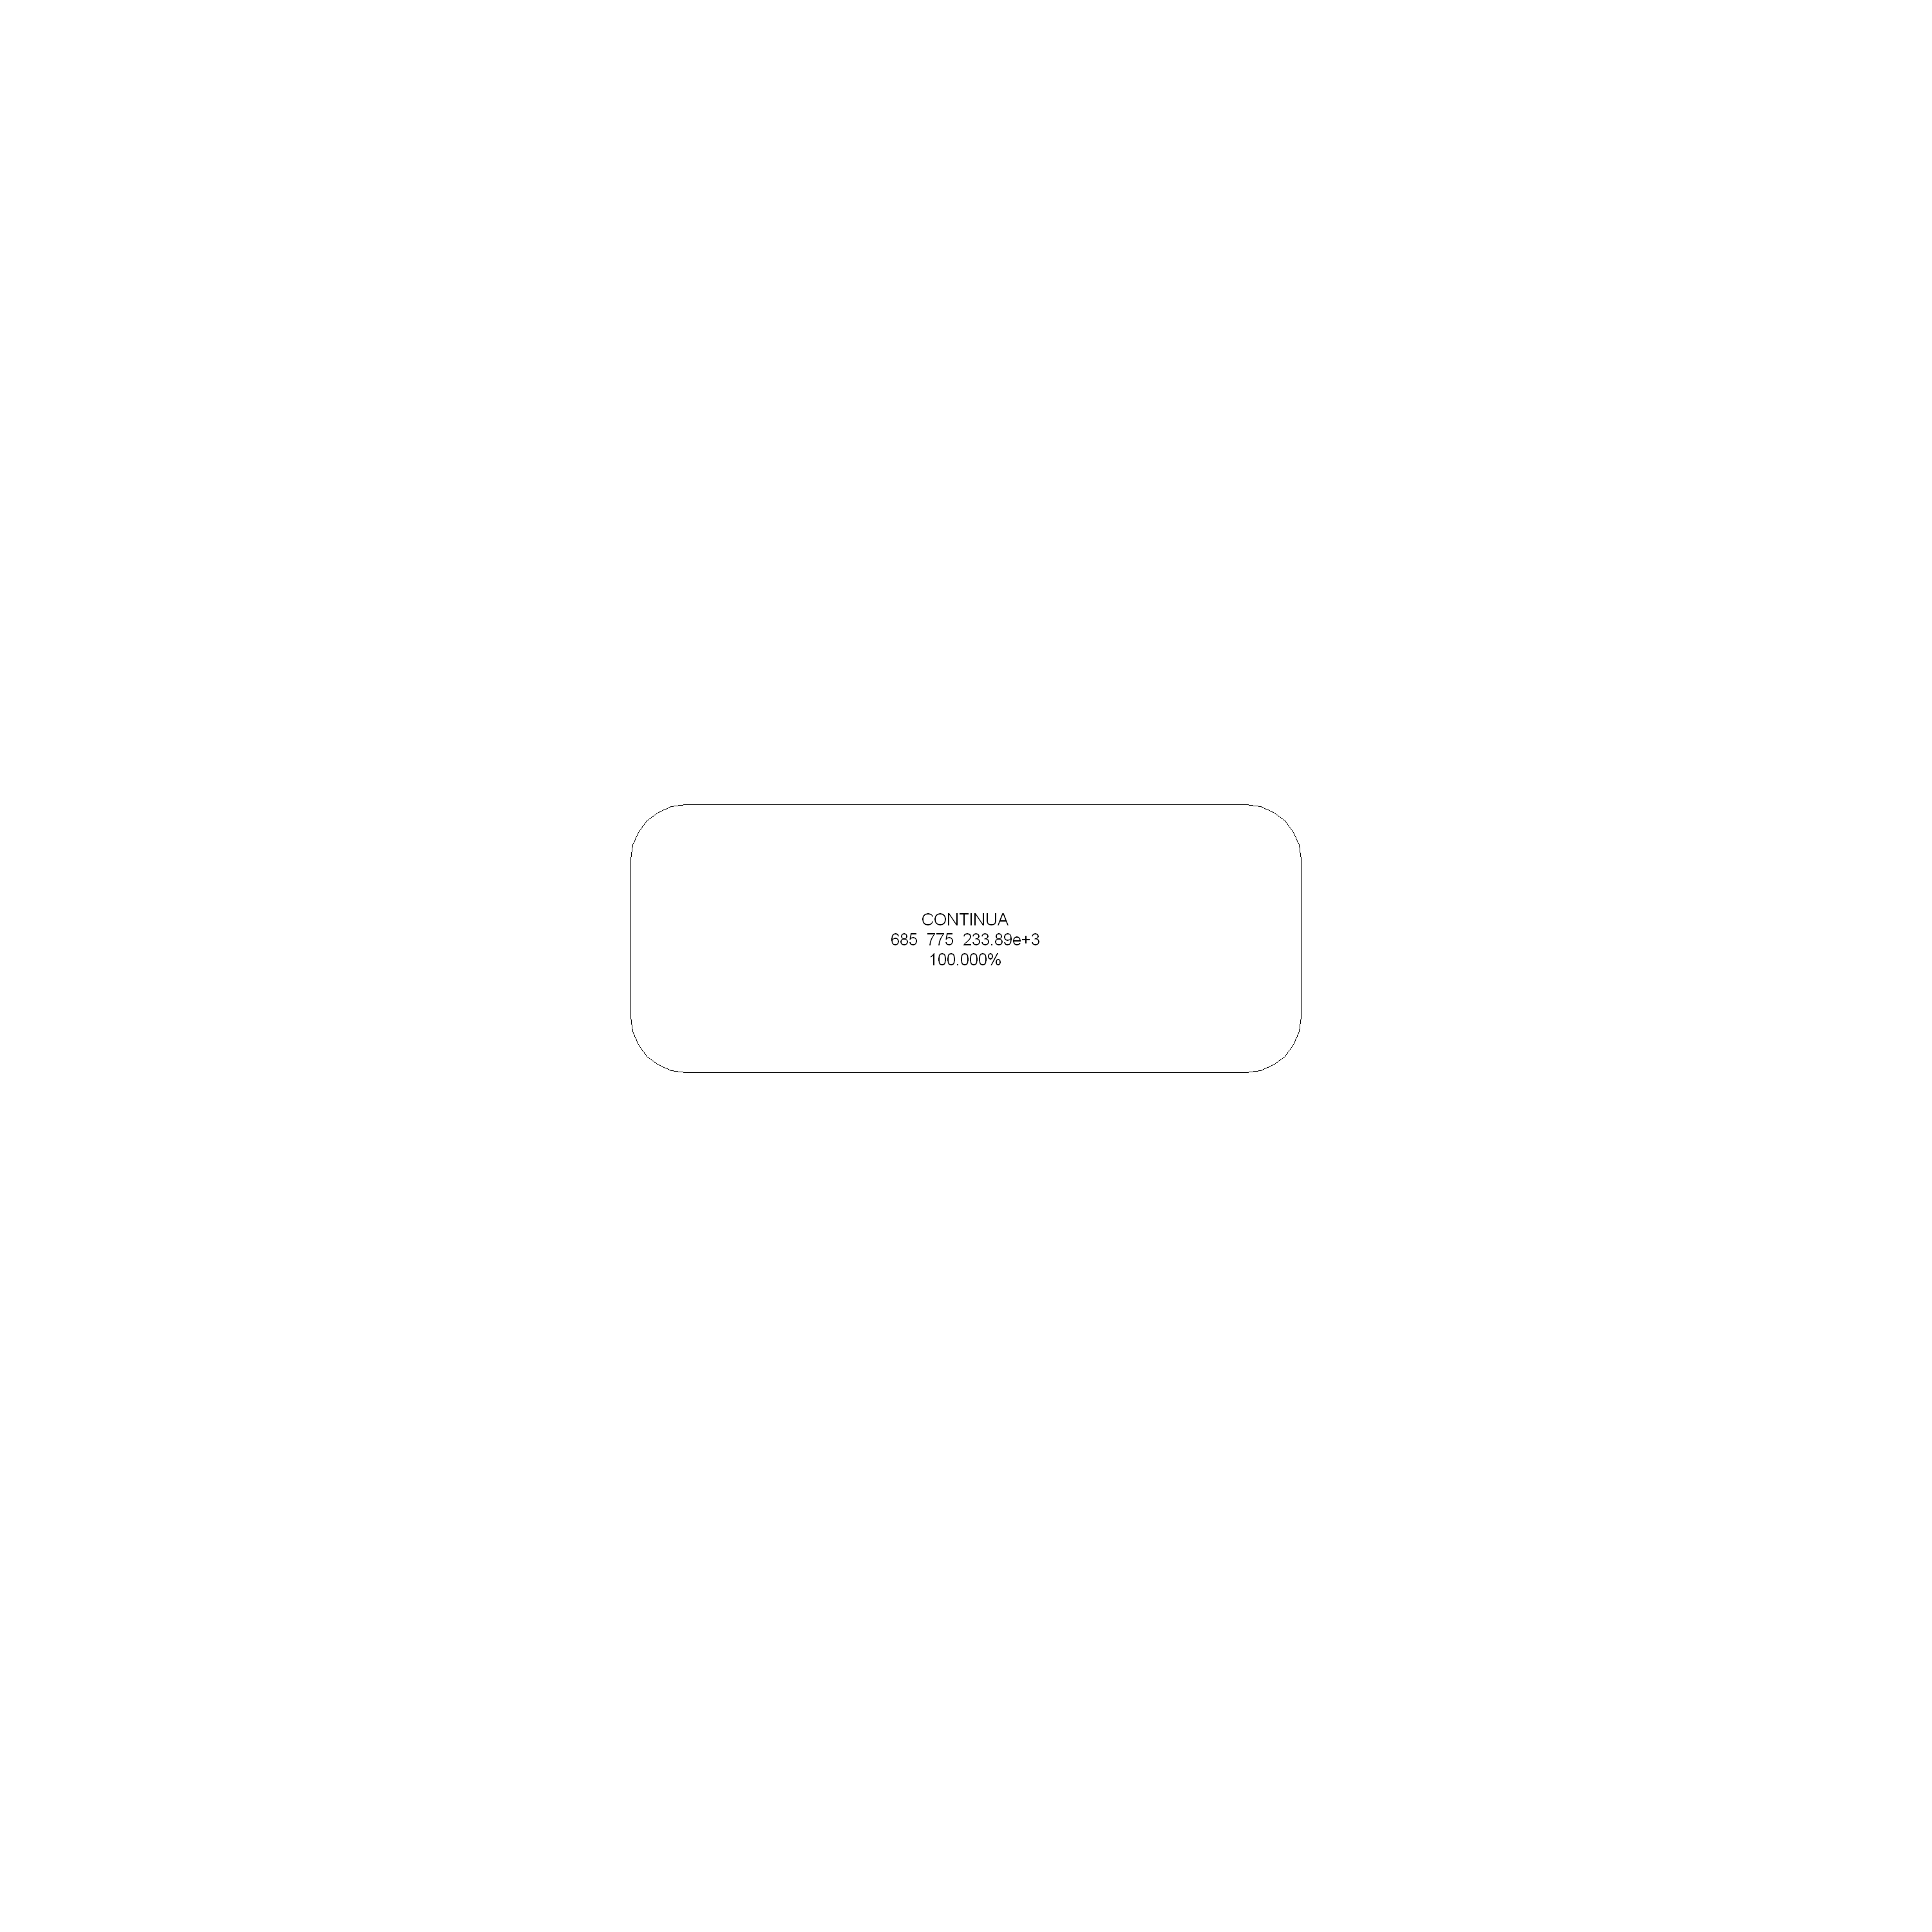

In [8]:
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

Ha salido solo la raiz del arbol
<br>
Los tres numeros que muestra en el nodo con la cantidad de BAJA+1, BAJA+2 y CONTINUA, en ese orden, alfabetico.
<br>
la cantidad de CONTINUA   la está mostrando en notacion científica

### cambio hiperparámetros del arbol para salga algo mas que un solo nodo

El hiperparámetro cp  *complexity*   limita el split de los nodos.
<br>
El default es  cp=0.05
<br>
Pruebo con cp=0.0  a ver si "se abre el arbol"

Leo la documentación de la libreria rpart  https://cran.r-project.org/web/packages/rpart/rpart.pdf   y veo que existe un hiperparámetro de la funcion rpart  llamado **xval** que es para hacer cross validation, que por default viene seteado en xval=10 .   No me interesa en este momento que haga cross validation, para evitarlo voy a poner  *xval=0*

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


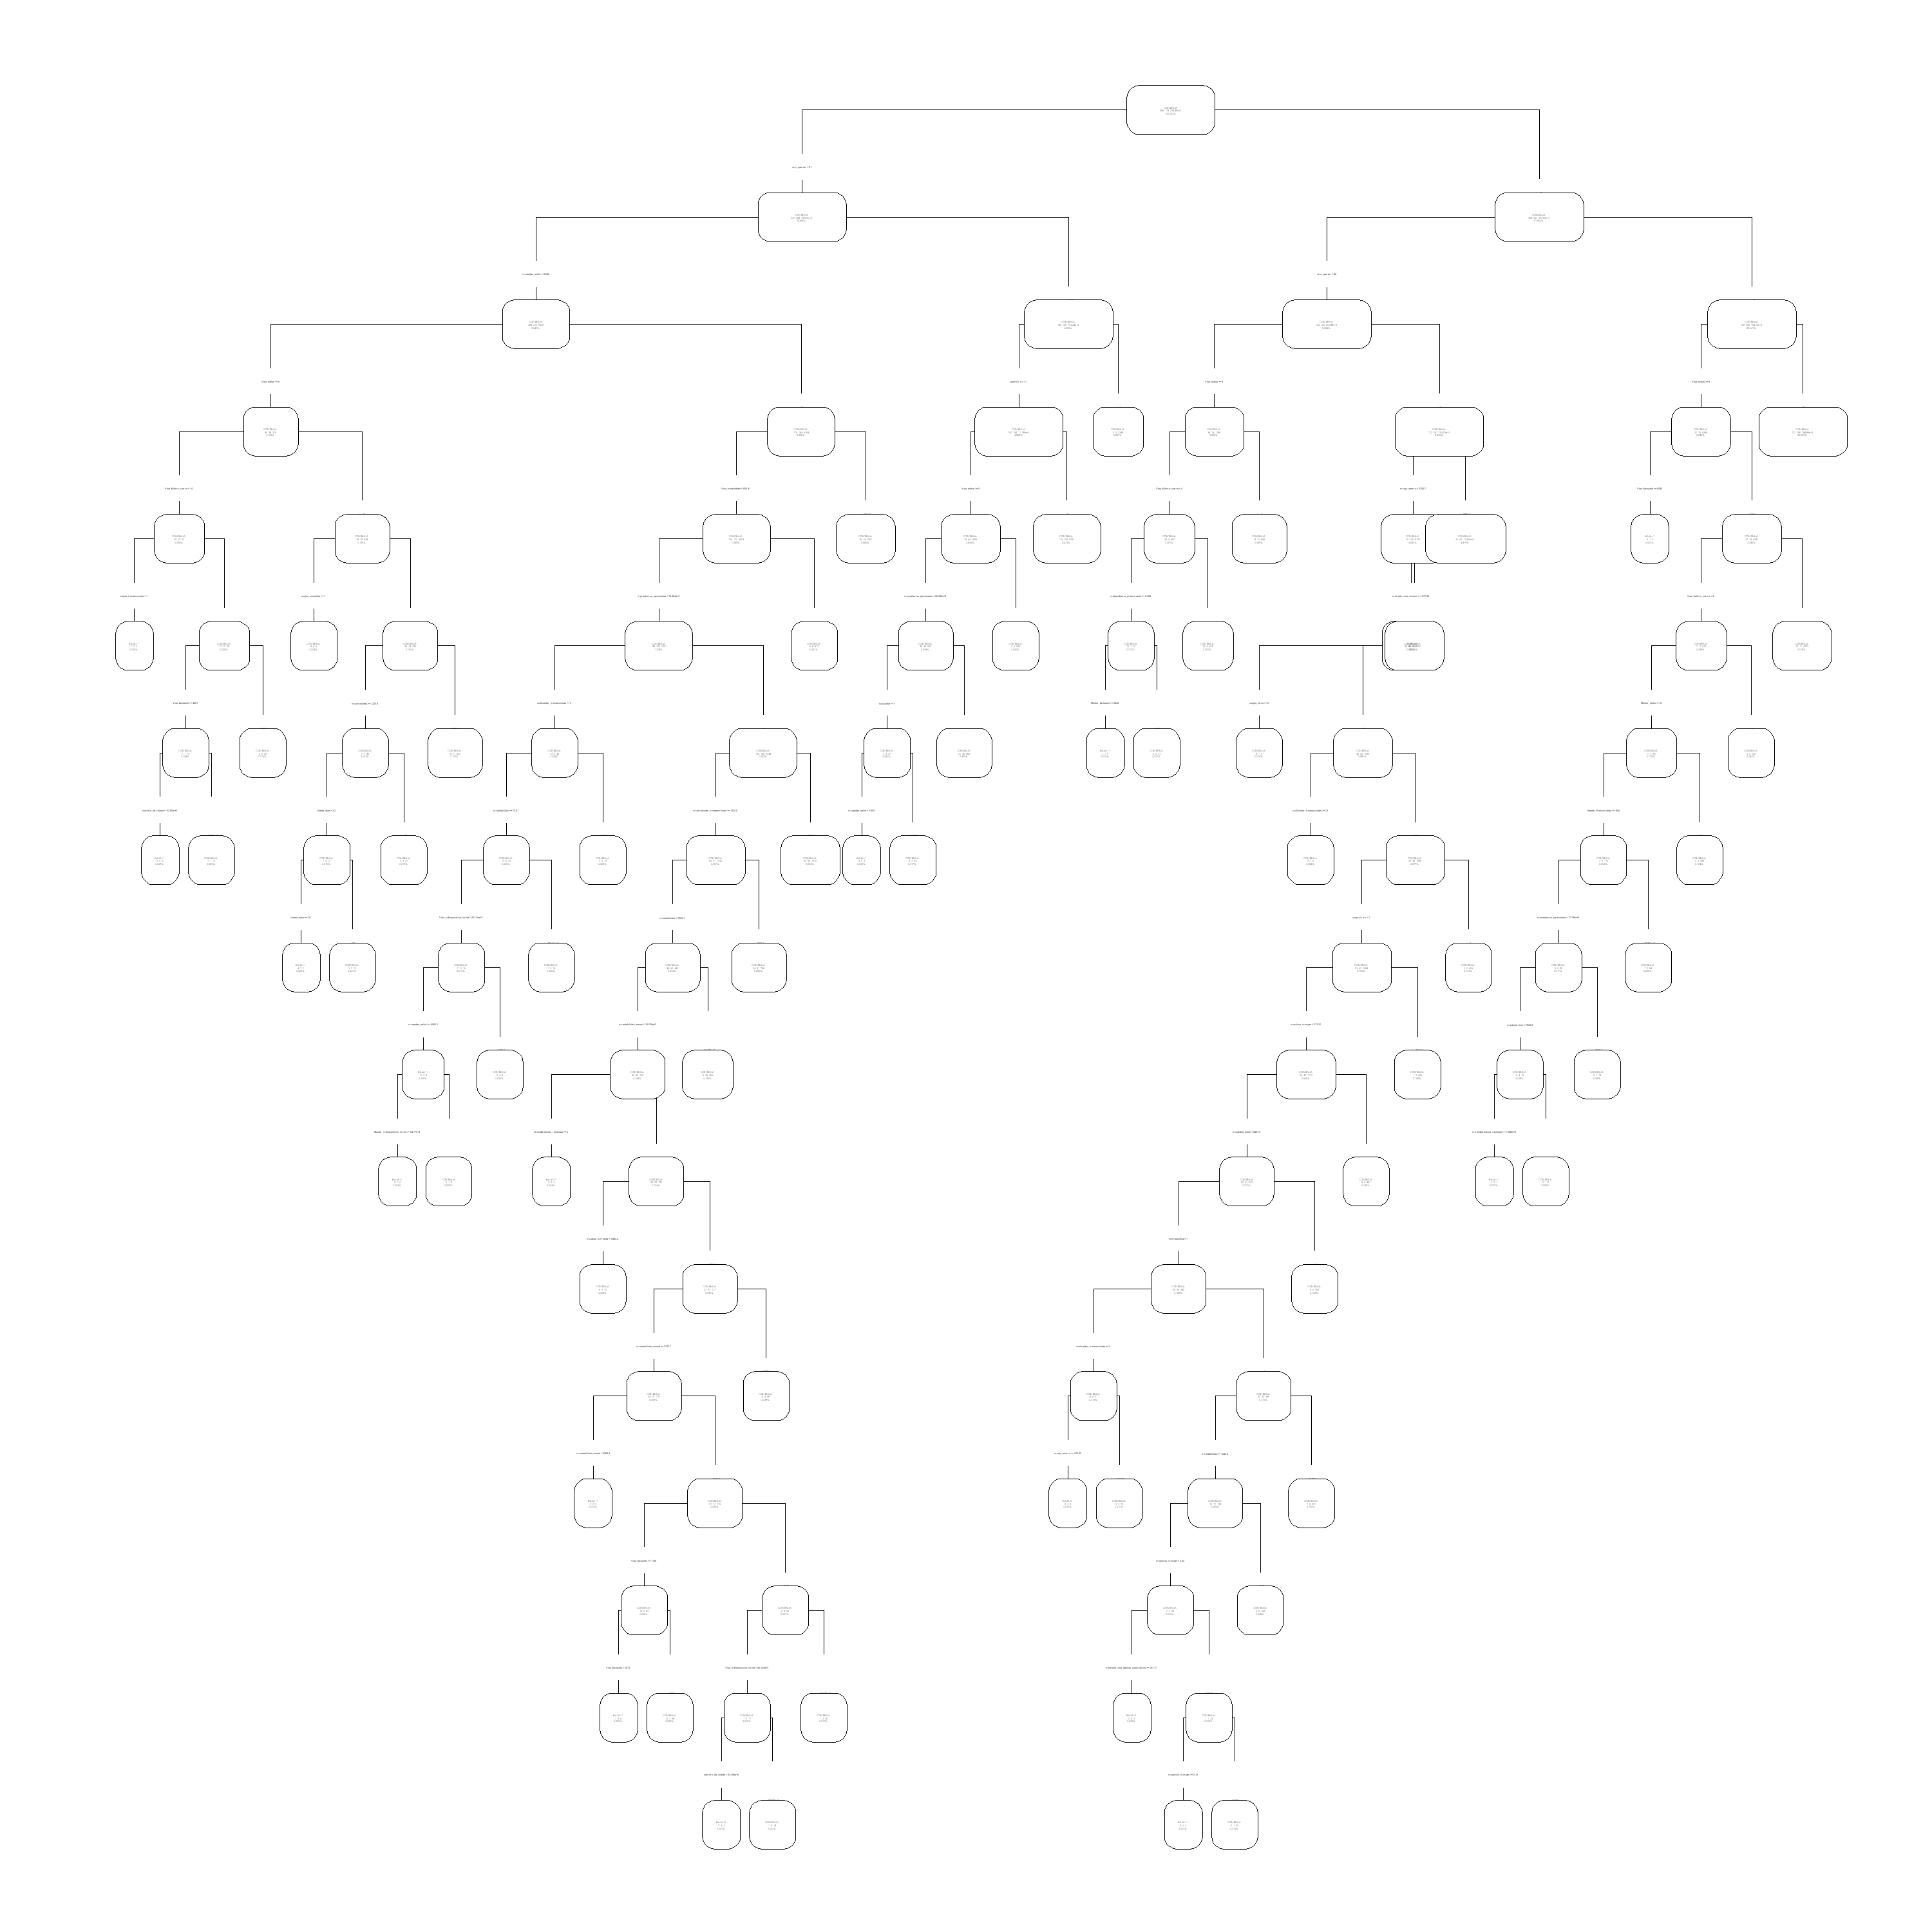

In [9]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= 0.0 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

sale un arbol de gran profundidad  que ni se puede visualizar
<br>
el mensaje  ""labs do not fit even at cex 0.15, there may be some overplotting"" me dice que no pudo dibujarlo correctamente
<br>
lamentablemente me doy cuenta la libreria rpart.plot es mala
<br>
establezco  maxdepth=2 para poder apreciarlo

Warning message:
"cex and tweak both specified, applying both"


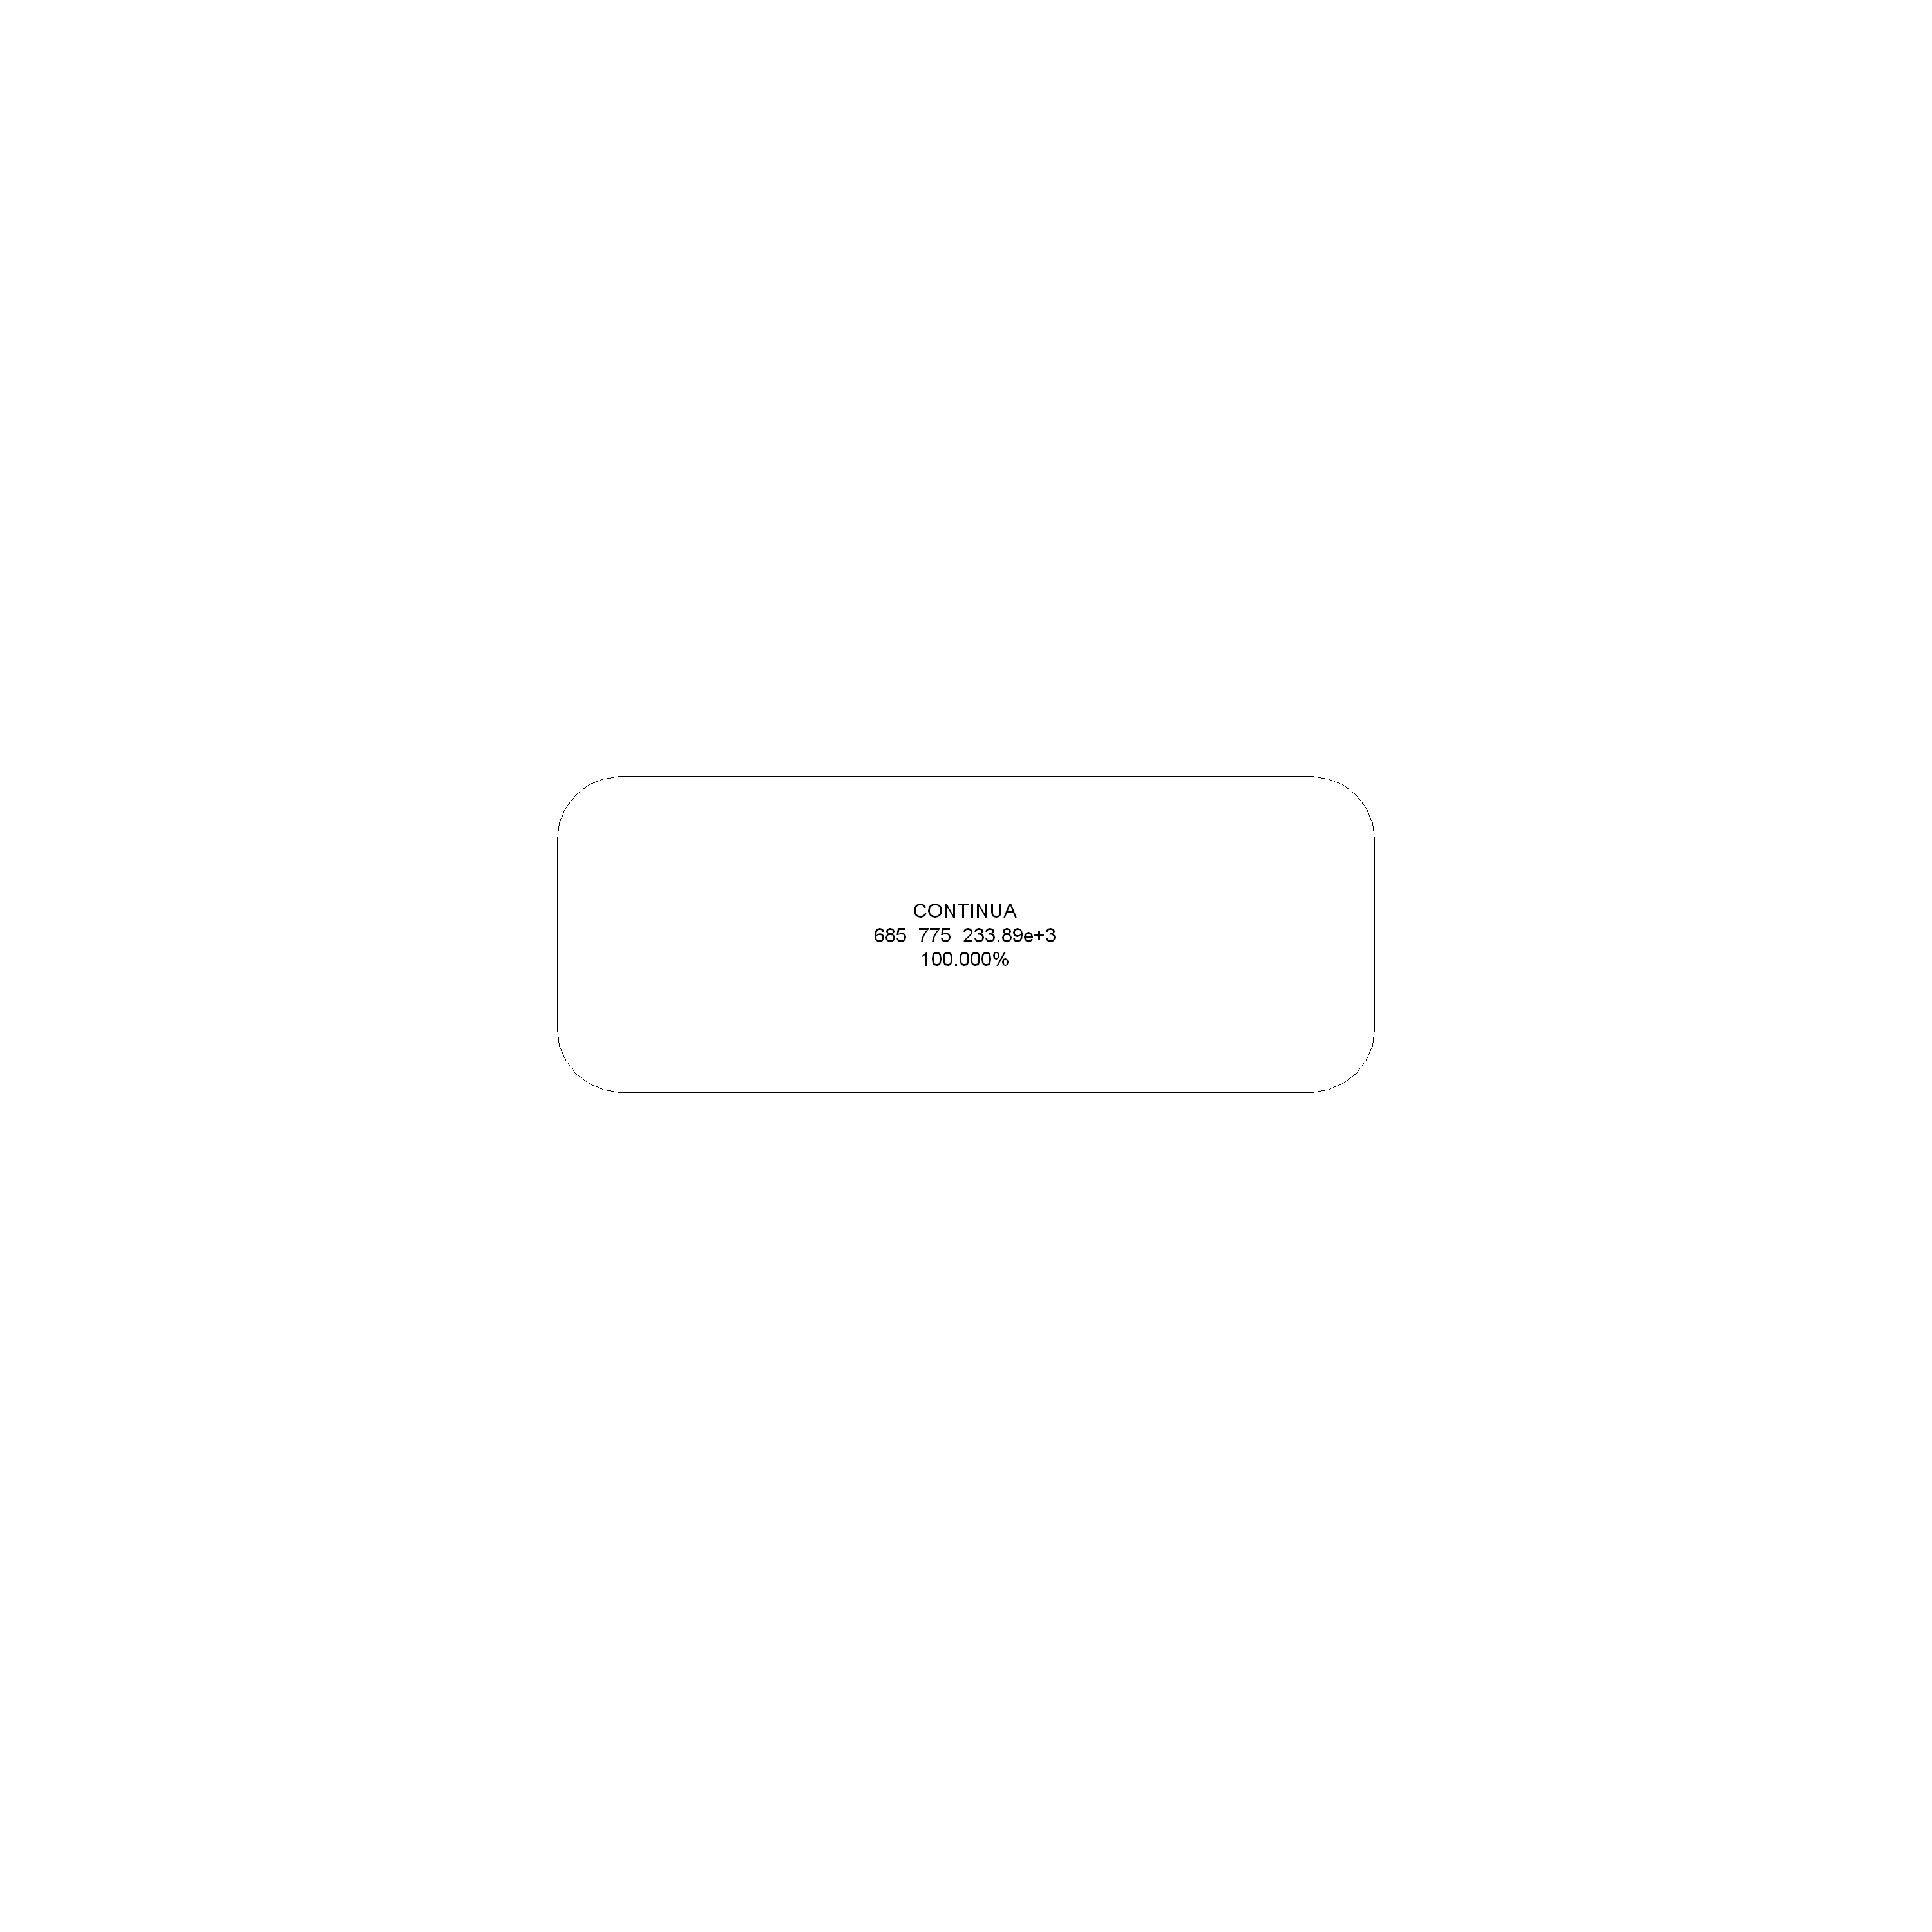

In [10]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= 0.0,
                   maxdepth= 2 )

#imprimo el modelo graficamente
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3, cex=1.2)

Evidentemente no ha podado el arbol como esperaba.
<br>
Corto por lo sano,  y establezco  cp=-1  para que siempre se abra el arbol

#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 3 )

#imprimo el modelo graficamentne
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.3)

Warning message:
"cex and tweak both specified, applying both"


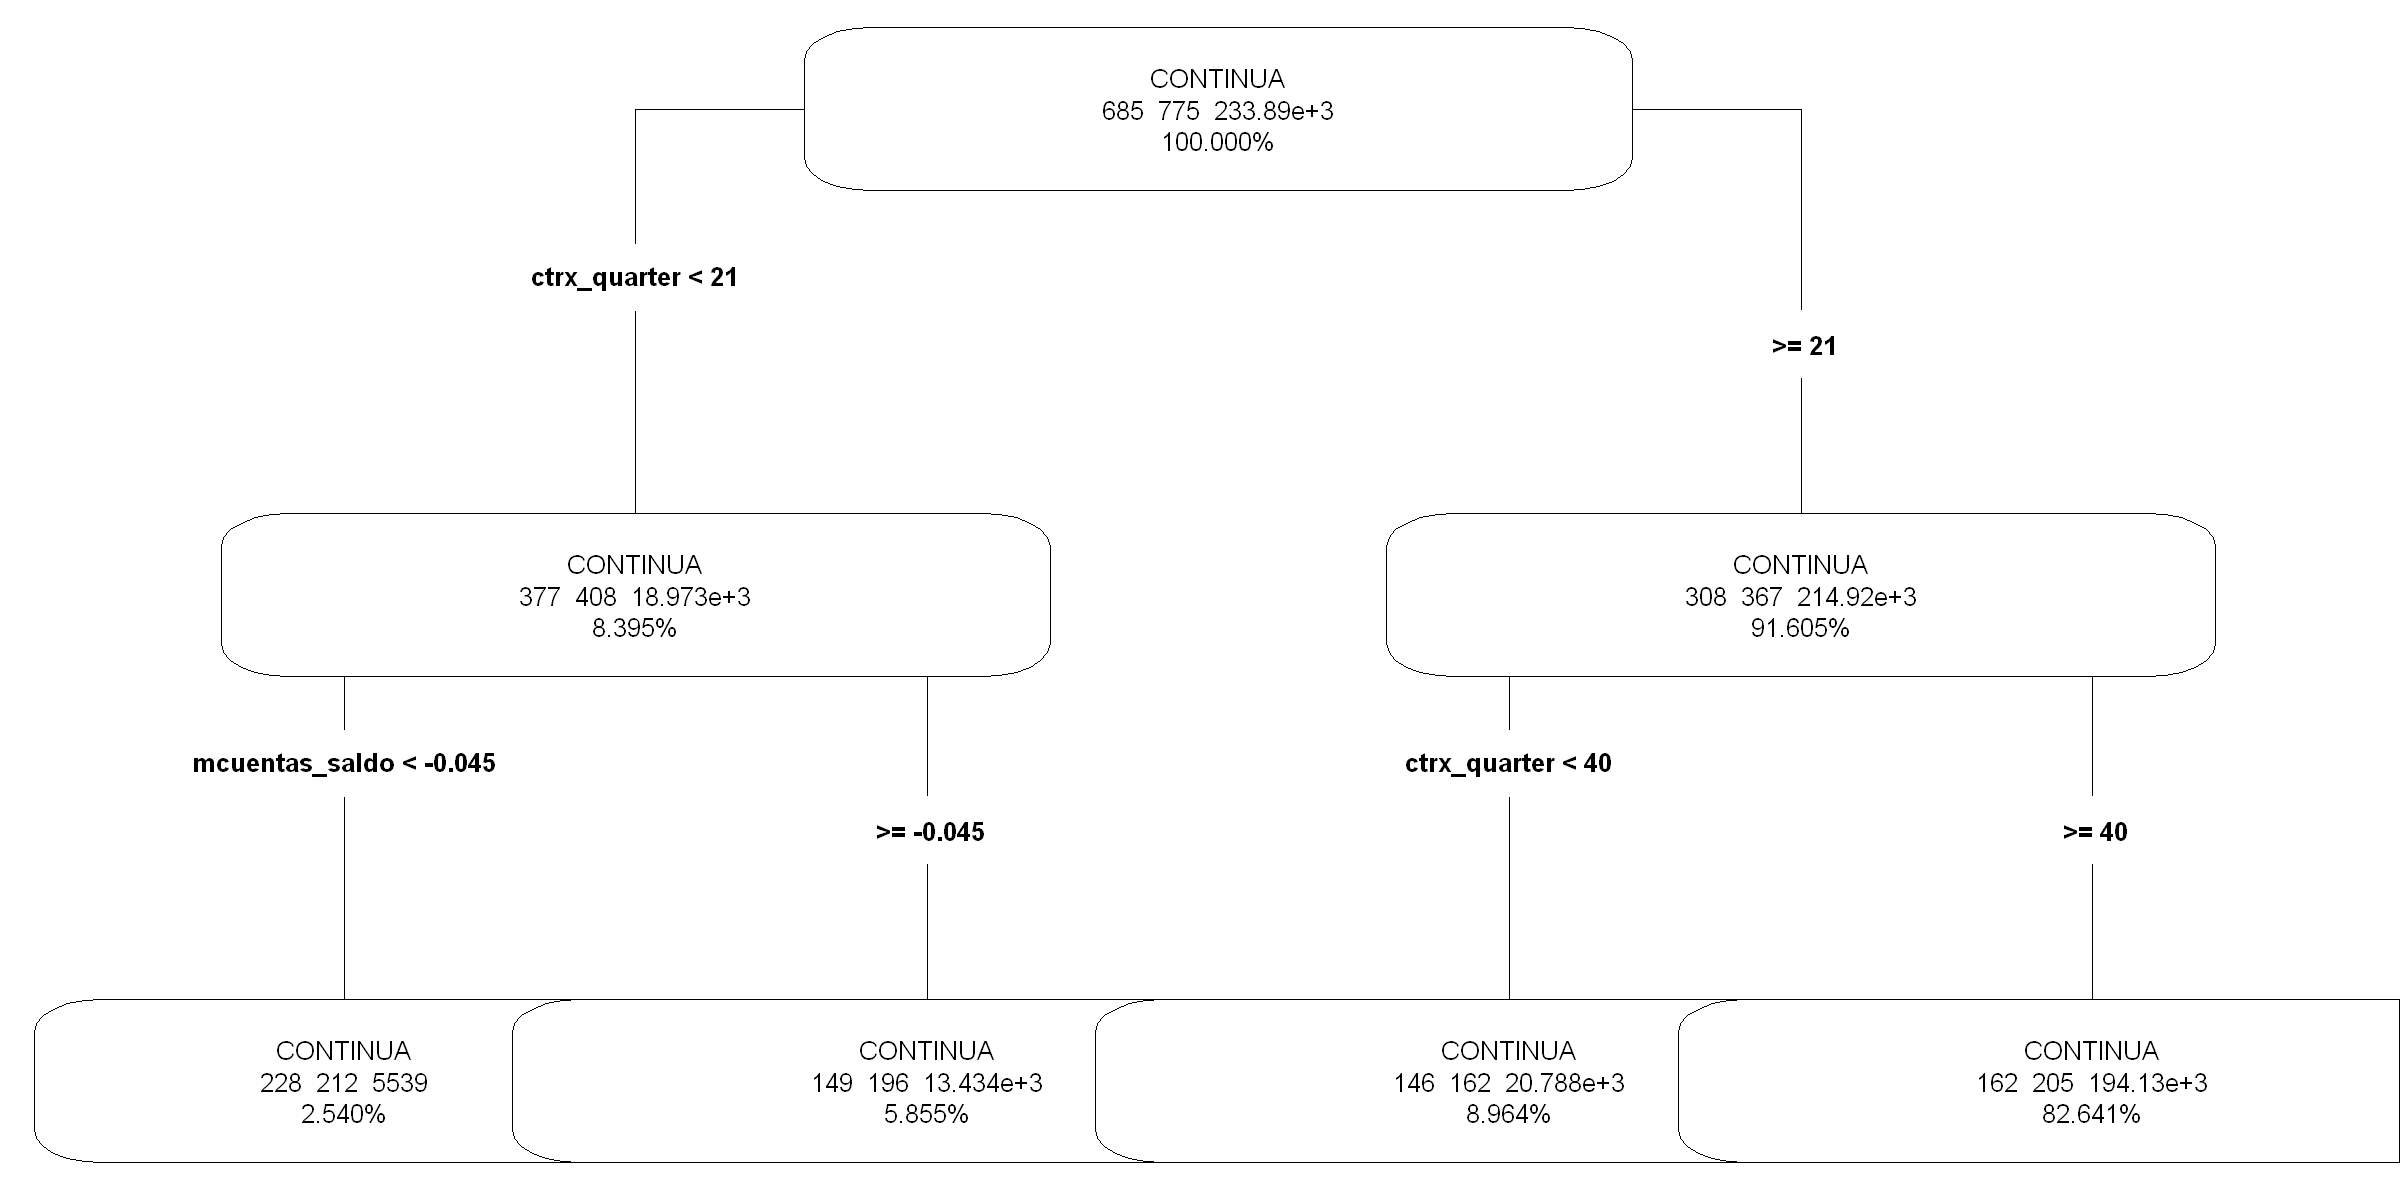

In [11]:
#genero el modelo
modelo <-  rpart(  formula= "clase_ternaria ~ ." ,
                   data= dataset,
                   xval= 0,
                   cp= -1,
                   maxdepth= 2 )

#imprimo el modelo graficamente
options(repr.plot.width=20, repr.plot.height=10) 
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0, tweak=1.1, cex=1.2)

### Disgresión : aprendo a borrar la memoria

Listo los objetos que estan en la memoria de R en este momento

In [12]:
ls()

[1] "dataset" "modelo"

creo una variable a ver que sucede

In [13]:
a <-  1

me vuelvo a fijar que objtetos estan en la memoria, deberia aparecer la nueva variable **a**

In [14]:
ls()

[1] "a"       "dataset" "modelo"

tal cual esperaba, aparece el nuevo objeto, la variable  **a**

In [ ]:
Me fijo cuanta memoria esta disponible

In [15]:
memory.size()

[1] 562.86

In [ ]:
Borro **TODOS** los objetos que estan en la memoria de R

In [27]:
rm( list=ls())

In [ ]:
Me vuelvo a fijar cuanta memoria hay disponible

In [30]:
memory.size()

[1] 66.83

In [ ]:
llama a **gc()** garbaje collection, que me va a liberar mas aún la memoria
<br>
https://cran.r-project.org/web/packages/profmem/vignettes/profmem.html

In [29]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,667381,35.7,2396738,128.0,2259593,120.7
Vcells,1289408,9.9,85691119,653.8,167288526,1276.4


In [19]:
memory.size()

[1] 107.48

In [ ]:
Ahora si, limpie bore todos los objetos de R y limpie la memoria